# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scipy
from scipy import stats
#mport scipy.stats
%matplotlib inline

df = pd.read_csv(r'C:\Users\lakshya_hanshvik\Desktop\sb\assingment_statistics\EDA_human_temperature\data/human_body_temperature.csv')

In [33]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [34]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Q1) Is the distribution of body temperatures normal?

1 . Characteristic of the normal distribution is that it is symmetrical. This means that if the distribution is cut in half,       each side would be the mirror of the other. It also must form a bell-shaped curve  to be normal. A bimodal  or uniform         distribution may be symmetrical; 
    From the Histogram and the PDF plot we can see that the distribution is almost symmetrical and bell-shaped.
    Mean almost cuts the distribution into half

2 . For Normal distribution  the mean , median are equal.
    Mean = 98.25
    Median = 98.3
 
3 . The CDF of the data  overlaps with  the CDF of a sample set that is modeled as a normal distribution and 
     68% of observations are within 1 standard deviation and that 95% of observations are within 2 standard deviations.

4 . The QQ plot and the CDF plot , show that the  distribution of the data is very close to normal

5 . From the central limit theorem, when sample size is greater than or equal to, 30, we can treat the sampling distribution of 
    as approximately normal regardless of the shape of the parent population.(In this case sample size is 130)

6 . For normal distribution  we need individual observations to be independent.(our observations are independent)

conclusion : From the Plots and observations we can safely confirm that the distribution of body temperature in close to normal
    

In [35]:
mean_temp = np.mean(df['temperature'])
std_temp = np.std(df['temperature'])
std_temp ,mean_temp

(0.7303577789050377, 98.24923076923078)

In [36]:
k2,p=scipy.stats.normaltest(df['temperature'])
p

0.2587479863488254

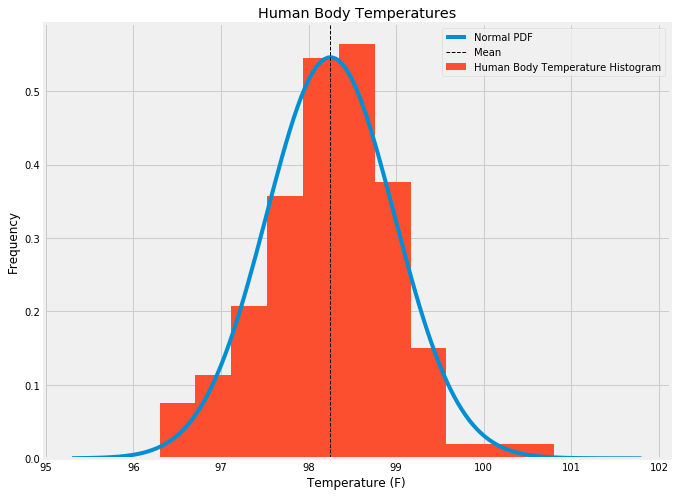

In [37]:

plt.figure(figsize=(10,8))


size = np.linspace(df['temperature'].min()-1, df['temperature'].max()+1,150)
pdf = stats.norm.pdf(size, mean_temp, std_temp)
_= plt.plot(size, pdf)

n_bins = int(np.sqrt(len(df['temperature'])))
_ = plt.hist(df['temperature'], bins= n_bins,density=True)


_ = plt.axvline(mean_temp, color='k', linestyle='dashed', linewidth=1)
#_ = plt.axvline(np.median(df['temperature']), color='g', linestyle='dashed', linewidth=1)
                
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.title('Human Body Temperatures')
_ = plt.legend(['Normal PDF','Mean','Human Body Temperature Histogram' ])

In [38]:
#defining Empirical Cumulative Distribution Function to plot sample cumulative distribution vs. the theoretical normal

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

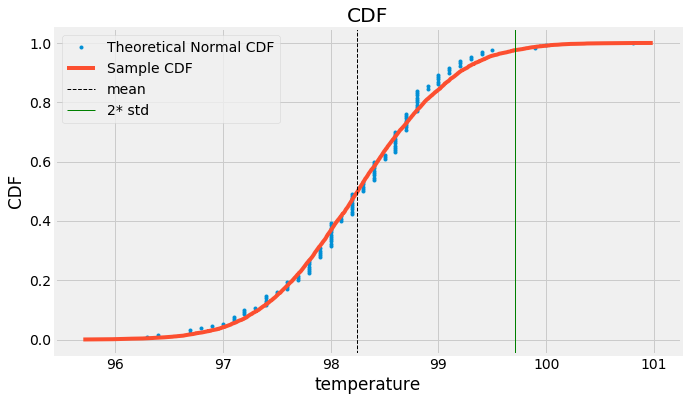

In [39]:
mean_temp = np.mean(df['temperature'])
std_temp = np.std(df['temperature'])

samples = np.random.normal(mean_temp,std_temp,10000)

x,y = ecdf(df['temperature'])
x_sample,y_sample = ecdf(samples)

# Plot the CDFs 
_ = plt.figure(figsize=(10,6))
_ = plt.style.use('fivethirtyeight')

_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.plot(x_sample,y_sample)
_ = plt.axvline(mean_temp, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_temp+ 2*std_temp, color='g', linestyle='solid', linewidth=1)

_ = plt.xlabel("temperature")
_ = plt.ylabel("CDF")
_ = plt.legend(['Theoretical Normal CDF', 'Sample CDF', 'mean' , '2* std'],loc='upper left')
_ = plt.title("CDF")

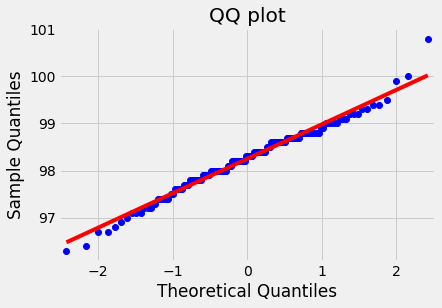

In [40]:

# QQ Plot
from numpy.random import seed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df['temperature'], line='s')
_ = plt.title("QQ plot")


# Q2. Is the sample size large? Are the observations independent?

The definition of the central limit theorem reads that the sample size must be 'sufficiently large', but fails to define 'sufficiently large'. 
In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40.

conclusion : For our data of body temperatures , we have a sample set of 130 observations,hence the sample is large enough.

Observations can be considered Independent ,as one person's temperature does not depend on other person's temperature

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Q3.  Is the true population mean really 98.6 degrees F?
   
    1. First, try a bootstrap hypothesis test.
    2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    3. In this situation, is it appropriate to use the t or z statistic? 
    4. Now try using the other test. How is the result be different? Why?
    
    
CONCLUSIONS : 

1.  After analysing 100,000 samples, the p-value is 0.0, indicating that the null hypothesis should be rejected. The mean body     temperature of the sample set is  not 98.6°F, Hence we reject the Null Hypothesis

2.  When comparing the mean of a single sample to a population mean, a one-sample t-test is appropriate.

3.  Since we dont know the standard deviation of the population , we go for T test

4.  Both the T test and the Z test results confirm that we have to reject the Null Hypothesis , i.e true population mean is not     98.6 degrees F 

#Null Hypothesis: The true population mean is 98.6 degrees F.
#Alternate Hypothesis: The true population mean is not 98.6 degrees F.

significance value = 0.05
If p_value < 0.05   --->  Reject Null Hypothesis
If p_value >= 0.05  --->  Fail to reject Null Hypothesis


# Q 3.1 : First, try a bootstrap hypothesis test.


In [42]:

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(100000)

# Generate replicates
for i in range(100000):
    sample =  np.random.choice(df['temperature'] ,len(df['temperature']))
    bs_replicates[i] = np.mean(sample)

p_value = np.sum(bs_replicates == 98.6) / len(df['temperature'])   

print('p-value: {}'.format(p_value))
print('mean: {}'.format(np.mean(bs_replicates)))


p-value: 0.0
mean: 98.24916638461539


# Q 3.2  :  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

Two sample t-test : Use the 2-sample t-test when you want to analyze the difference between the means of two independent      samples.

One sample t-test :  Tests the mean of a single group against a known mean.Use a 1-sample t-test to assess the difference between a sample mean and the value of the null hypothesis.

Conclusion : When comparing the mean of a single sample to a population mean, a one-sample t-test is appropriate.

# Q  3.3 :  In this situation, is it appropriate to use the t or z statistic? 
# Q  3.4 :  Now try using the other test. How is the result be different? Why


Both z-tests and t-tests require data with a normal distribution, which means that the sample (or population) data is distributed evenly around the mean

T-tests are calculations used to test a hypothesis, but they are most useful when we need to determine if there is a statistically significant difference between two independent sample groups. In other words, a t-test asks whether a difference between the means of two groups is unlikely to have occurred because of random chance. Usually, t-tests are most appropriate when dealing with problems with a limited sample size (n < 30).

The z-score tells you how far, in standard deviations, a data point is from the mean or average of a data set. A z-test compares a sample to a defined population and is typically used for dealing with problems relating to large samples (n > 30). Z-tests can also be helpful when we want to test a hypothesis. Generally, they are most useful when the standard deviation is known.


Conclusion  : For our sample , size is greater than 30 but we do not know the standard deviation , hence T-test is a better option.


In [43]:
#  One sample T-test

t_value , p_Ttest = stats.ttest_1samp(df['temperature'], 98.6)
print(' T-Statistic  = {}      p-value = {}' .format((abs(t_value)),p_Ttest))


 T-Statistic  = 5.4548232923645195      p-value = 2.4106320415561276e-07


In [45]:
# Z test

z_value, p_Ztest = ztest(df['temperature'],value = 98.6)
print(' Z Statistic  = {}      p-value = {}' .format((abs(z_value)),p_Ztest))


 Z Statistic  = 5.4548232923645195      p-value = 4.9021570141012155e-08


Conclusions : From the T test  t value of 5.45 implies that we would observe a mean of 98.6 at 5.45 standard deviations from our sample mean.
P-value  from T test is very very small and hence a there is a very low probability of observing a mean body temperature of 98.6  

From the Z test we arrive at the same conclusion as T test with a very low p value

### Q4) Draw a small sample of size 10 from the data and repeat both tests.
*Which one is the correct one to use?

*What do you notice? What does this tell you about the difference in application of the tt and zz statistic?

In [65]:
np.random.seed(42)
sample = np.random.choice(df['temperature'], size=10)

print("samples statistics")
t_value , p_Ttest = stats.ttest_1samp(sample, 98.6)
print(' T-Statistic  = {}      p-value = {}' .format((abs(t_value)),p_Ttest))

z_value, p_Ztest = ztest(sample,value = 98.6)
print(' Z Statistic  = {}      p-value = {}' .format((abs(z_value)),p_Ztest))

samples statistics
 T-Statistic  = 3.0934479202257976      p-value = 0.012857704604809363
 Z Statistic  = 3.0934479202257976      p-value = 0.0019784527476214603


Conclusion : Considering the sample size of 10  and we dont have the standard deviation value of the population, T test is better option.

T value of 3 and p value < 0.05 , suggests that we Reject the Null hypothesis.

# Q5)At what temperature should we consider someone's temperature to be                 "abnormal"?
Start by computing the margin of error and confidence interval# 

In [102]:
#confidence interval and margin of error

# alpha = 0.05, confidence coefficient = 95%

margin_error = std_temp / np.sqrt(len(df['temperature']))
print('margin of error = {}'.format(margin_error))

# confidence interval for one draw
CI_left, CI_right = stats.norm.interval(0.95, loc=mean_temp, scale=std_temp)
print('95% Confidence interval: {}°F to {}°F'.format(CI_left, CI_right))



margin of error = 0.06405661469519336
95% Confidence interval: 96.81775582674824°F to 99.68070571171332°F


Conclusion :  Temperature below 96.8177°F  and above 99.6807°F is considered "abnormal".              

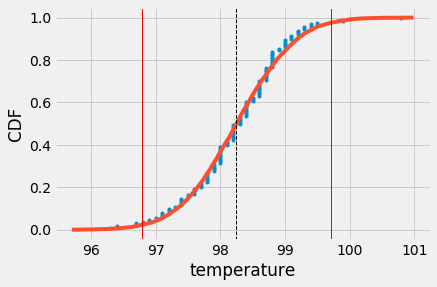

In [111]:
x,y = ecdf(df['temperature'])
x_sample,y_sample = ecdf(samples)

_ = plt.figure(figsize=(6,4))
_ = plt.style.use('fivethirtyeight')
_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.plot(x_sample,y_sample)
_ = plt.axvline(mean_temp, color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(mean_temp + 2*std_temp, color='g', linestyle='solid', linewidth=1)
_ = plt.axvline(mean_temp - 2*std_temp, color='r', linestyle='solid', linewidth=1)

_ = plt.xlabel("temperature")
_ = plt.ylabel("CDF")


## Q6) Is there a significant difference between males and females in normal temperature?
What test did you use and why?

In [131]:
female_temp = df[df.gender == 'F']['temperature']
male_temp = df[df.gender == 'M']['temperature']

Males   : mean = 98.1046153846154 , std = 0.6987557623265908
Females : mean = 98.39384615384613 , std = 0.7434877527313665


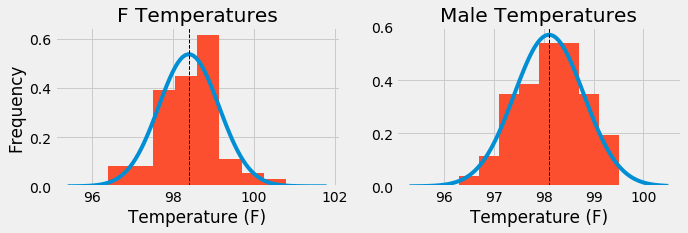

In [161]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
size = np.linspace(female_temp.min()-1, female_temp.max()+1, 100)
pdf = stats.norm.pdf(size, female_temp.mean(), female_temp.std())
_= plt.plot(size, pdf)

n_bins = int(np.sqrt(len(female_temp)))
_ = plt.hist(female_temp, bins= n_bins,density=True)

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.title('F Temperatures')
#_ = plt.legend(['PDF','female temperatures Histogram'])
_ = plt.axvline(female_temp.mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(2,2,2)
size = np.linspace(male_temp.min()-1, male_temp.max()+1, 100)
pdf = stats.norm.pdf(size, male_temp.mean(), male_temp.std())
_= plt.plot(size, pdf)

n_bins = int(np.sqrt(len(male_temp)))
_ = plt.hist(male_temp, bins= n_bins,density=True)
_ = plt.axvline(male_temp.mean(), color='k', linestyle='dashed', linewidth=1)

_ = plt.xlabel('Temperature (F)')
_ = plt.title('Male Temperatures')

print("Males   : mean = {} , std = {}".format(male_temp.mean(), male_temp.std()))
print("Females : mean = {} , std = {}".format(female_temp.mean(), female_temp.std()))


# A two-sample bootstrap hypothesis test for difference of male and female means

Null Hypothesis : There is no difference between Male and Female temperatures 

Alternate Hypothesis :Means of Male and female temperatures are different

alpha = 0.05

In [163]:
def draw_bs_reps(data):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(10000)

    # Generate replicates
    for i in range(10000):
        bs_replicates[i] = np.mean(np.random.choice(data, size=len(data)))

    return bs_replicates

In [171]:
# Generate shifted arrays
male_shifted = male_temp - np.mean(male_temp) + mean_temp
female_shifted = female_temp - np.mean(female_temp) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_reps(male_shifted)
bs_replicates_female = draw_bs_reps(female_shifted)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_male - bs_replicates_female


# Compute and print p-value: p
diff = np.mean(male_temp) - np.mean(female_temp)
p = np.sum(bs_replicates == diff / len(bs_replicates))
print('p-value =', p)


p-value = 0


Conclusion : With p value of 0 , we reject the null Hypothesis, i.e there is a difference between male and female mean temperatures


# Write a story with your conclusion in the context of the original problem. 

The Body temperatures plots(Histograms, pdf and the QQ plot ) confirm that the temperature is close to Normal Distribution.

The mean body temperature is proved to be 98.249°F  and not 98.6°F

The p-values from the bootstrap hypothesis tests require that the null hypothesis  to be rejected and support the alternate hypothesis that mean male and female body temperatures are different. 
